<a href="https://colab.research.google.com/github/atheostheos/ML_2023/blob/main/08_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Сравнить результат с классификацией датасета digits, предобработанного и не предобработанного алгоритмом t-SNE.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def sigmoid(x, deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

class Model:
  def __init__(self, in_shape: int, num_class: int):
    self.input = in_shape
    self.hidden = 16
    self.output = num_class

    self.W0 = np.random.rand(self.input+1, self.hidden)
    self.W1 = np.random.rand(self.hidden+1, self.output)

  def convert_one_hot(self, y):
      y_vect = np.zeros((len(y), self.output))
      for i in range(len(y)):
          y_vect[i, y[i]] = 1
      return np.array(y_vect)

  def train(self, X_train, y_train, epochs=10000, eta=50):
    for epoch in tqdm(range(epochs)):
      # прямое распространение информации
      L0 = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
      L1 = sigmoid(np.dot(L0, self.W0))
      L1 = np.append(L1, np.ones((len(L1), 1)), axis=1)
      Z = sigmoid(np.dot(L1, self.W1))
      # обратное распространение ошибки
      delta2 = y_train - Z
      G2 = delta2 * sigmoid(Z, True)
      delta1 = np.dot(G2, self.W1.T)
      G1 = delta1 * sigmoid(L1, True)
      # обновление весов
      self.W1 += eta * np.dot(L1.T, G2) / len(X_train)
      self.W0 += eta * np.dot(L0.T, G1[:, :-1]) / len(X_train)

  def predict(self, X_):
      L0 = np.append(X_, np.ones((len(X_), 1)), axis=1)
      L1 = sigmoid(np.dot(L0, self.W0))
      L1 = np.append(L1, np.ones((len(L1), 1)), axis=1)
      Z = sigmoid(np.dot(L1, self.W1))

      return np.argmax(Z, axis=1)

In [144]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

num_class = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = Model(X_train.shape[1], num_class)

y_train_vect = model.convert_one_hot(y_train)
y_test_vect = model.convert_one_hot(y_test)

In [145]:
model.train(X_train, y_train_vect)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [146]:
predicted_classes = model.predict(X_test)
print("Изначально: ")
print(y_test)
print("Предсказанные классы: ")
print(predicted_classes)

Изначально: 
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5]
Предсказанные классы: 
[6 9 9 7 2 1 5 2 5 2 1 9 4 0 4 2 9 7 9 7 4 2 9 7 5 6 2 5 6 2 4 9 1 4 4 6 9
 4 7 6 6 9 1 2 6 1 5 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 2 9 0 6 4 4 9 1 2 6 2 5 2 9 4 4 4 4 9 5 9 1 9 5 9 4 2 7
 7 4 4 1 9 2 7 9 7 2 6 9 4 2 7 2 7 5 6 7 5 7 9 0 6 6 4 2 9 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 1 9 9 7 7 2 9 0 4 5 9 6 5 9 9 2 4 2 1 9 7 7 2 2 9 9 2 0 9
 2 2 5 6 9 9 4 1 5 4 2 9 6 4 9 5 9 5 7 2

Artificial Neural Network:  0.8185185185185185


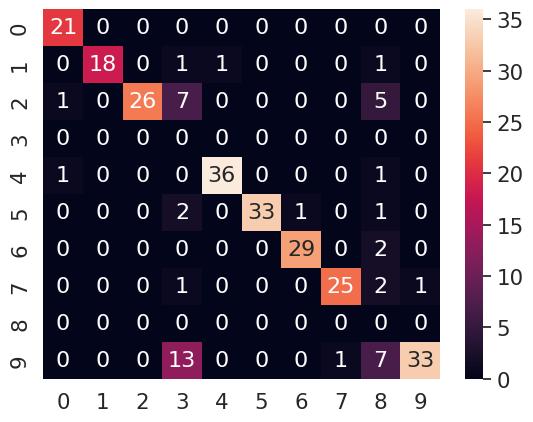

In [147]:
###################### код для вычисления достоверности классификатора
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print ('Artificial Neural Network: ',
       accuracy_score(y_pred, y_test))

df_cm = pd.DataFrame(confusion_matrix(y_pred, y_test), range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [148]:
from sklearn.manifold import TSNE

digits = load_digits()
X, y = digits.data, digits.target

scaler = StandardScaler()
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

X = scaler.fit_transform(X)
X = tsne.fit_transform(X)

num_class = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = Model(X_train.shape[1], num_class)

y_train_vect = model.convert_one_hot(y_train)
y_test_vect = model.convert_one_hot(y_test)

In [149]:
model.train(X_train, y_train_vect)

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-143-77ceea2e4cca>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


<ipython-input-143-77ceea2e4cca>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Artificial Neural Network:  0.5518518518518518


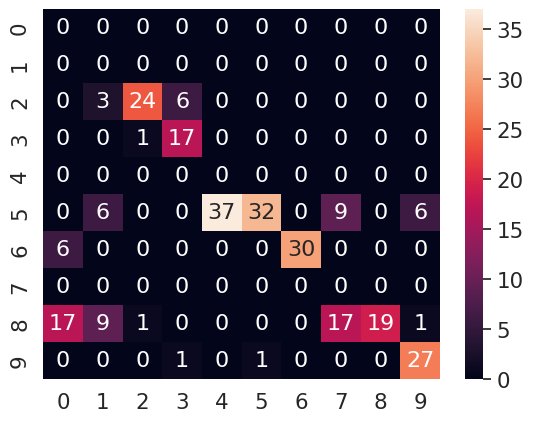

In [150]:
y_pred = model.predict(X_test)
print('Artificial Neural Network: ',
       accuracy_score(y_pred, y_test))

df_cm = pd.DataFrame(confusion_matrix(y_pred, y_test), range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Домашнее задание

3. Построить в Pytorch модель классификации набора данных MNIST с использованием сверточных нейронных сетей

In [151]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)])

train_data = datasets.MNIST(root='/content/mnist', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='/content/mnist', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=False)

In [152]:
next(iter(train_loader))[0].shape

torch.Size([256, 1, 28, 28])

In [153]:
# гиперпараметры :
batch_size = 256 # размер батча
learning_rate = 1e-3 # параметр скорости обучения
epochs = 10 # эпохи обучения

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class NCC(nn.Module):
    def __init__(self):
        super(NCC, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(256*6*6, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)  # Применяем пулинг для уменьшения размерности
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

ncc = NCC()
ncc.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ncc.parameters(), lr=learning_rate, momentum=0.9)

In [154]:
%%time

torch.manual_seed(42)

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = ncc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
    print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

print('Finished Training')

Epoch 1/10, Loss: 0.5239278078079224
[1] loss: 0.524
Epoch 2/10, Loss: 0.4690994918346405
[2] loss: 0.469
Epoch 3/10, Loss: 0.2401077002286911
[3] loss: 0.240
Epoch 4/10, Loss: 0.23354090750217438
[4] loss: 0.234
Epoch 5/10, Loss: 0.25483468174934387
[5] loss: 0.255
Epoch 6/10, Loss: 0.24671848118305206
[6] loss: 0.247
Epoch 7/10, Loss: 0.11147249490022659
[7] loss: 0.111
Epoch 8/10, Loss: 0.18934369087219238
[8] loss: 0.189
Epoch 9/10, Loss: 0.14778870344161987
[9] loss: 0.148
Epoch 10/10, Loss: 0.20780174434185028
[10] loss: 0.208
Finished Training
CPU times: user 21min 32s, sys: 6min 26s, total: 27min 58s
Wall time: 28min 8s


In [155]:
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        out = ncc(inputs)
        _, pred = torch.max(out.data, 1)
        y_pred += pred
        y_true += labels.tolist()

  0%|          | 0/40 [00:00<?, ?it/s]

Convolutional Neural Network:  0.9615


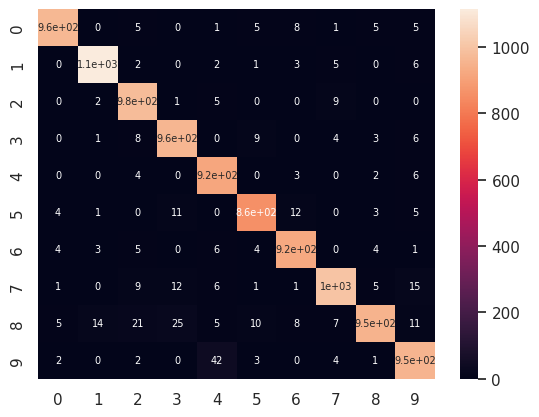

In [156]:
print('Convolutional Neural Network: ',
       accuracy_score(y_pred, y_true))

df_cm = pd.DataFrame(confusion_matrix(y_pred, y_true), range(10), range(10))

sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 7}) # font size

plt.show()